In [1]:
from matplotlib import pyplot as plt
from seaborn import kdeplot
from torch import linspace, rand
from torch.nn import Tanh

In [2]:
logits = linspace(-0.9, end=0.9, steps=600).view(size=(20, 30))
logits += rand(size=(20, 30))
logits[:,10], logits[:,20] = 100.0, -100.0
logits[0]

tensor([-2.7442e-01, -3.0278e-01, -1.7592e-01, -8.3130e-01, -8.3517e-01,
        -5.7072e-01, -3.2694e-01, -5.8297e-01, -3.1995e-01,  9.8978e-03,
         1.0000e+02, -5.8912e-01, -3.8905e-01, -7.6514e-01, -4.9796e-01,
        -7.4174e-01, -2.8115e-01, -4.2647e-01, -6.5543e-02, -4.0754e-01,
        -1.0000e+02, -3.9658e-01,  1.2965e-01, -5.0406e-01, -3.8922e-01,
        -1.1200e-01, -3.6664e-01, -3.3142e-01, -1.2590e-01, -1.6483e-01])

Assume the above logits are outputs of one of the intermediate layer of our model stack; the logits have the following distribution ...

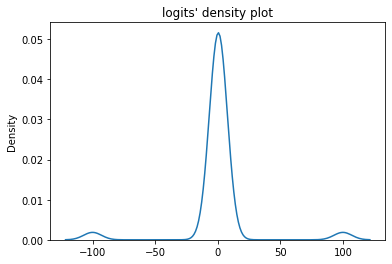

In [3]:
kdeplot(logits.flatten())
plt.title("logits' density plot")
plt.show()

we pass the above logits through an activation layer which are then transformed as follows:

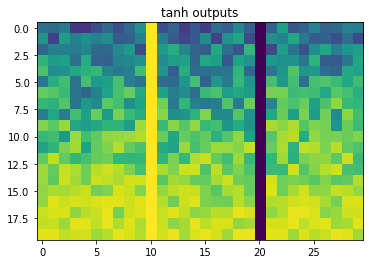

In [4]:
out = Tanh()(logits)
plt.imshow(out)
plt.title("tanh outputs")
plt.show()

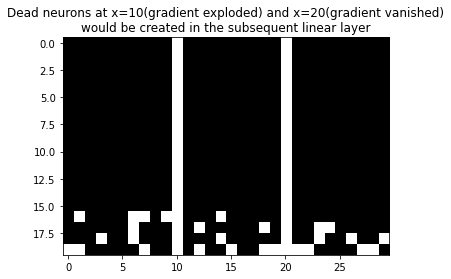

In [5]:
plt.imshow(out.abs() > 0.9, cmap='gray')
plt.title("Dead neurons at x=10(gradient exploded) and x=20(gradient vanished)\n"+\
          "would be created in the subsequent linear layer")
plt.show()